# Importing Libraries

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout, SimpleRNN
import keras_tuner

## Splitting the dataset

In [28]:
# loading the cleaned dataset
import zipfile

with zipfile.ZipFile('news_final.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [72]:
from ast import literal_eval
news_final = pd.read_csv("news_final", converters={'title': literal_eval,'all_text': literal_eval})

target = news_final['fake']
features = news_final[['title','all_text']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1,test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25) # 0.25 x 0.8 = 0.2, #20% valid

# Hypothesis 2: Testing Neural Network models

## Define Tokenizing, Padding, Plotting functions & Earlystopping

In [ ]:
def tokenize(train_data,val_data,test_data):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data)

    train_data = tokenizer.texts_to_sequences(train_data)
    val_data = tokenizer.texts_to_sequences(val_data)
    test_data = tokenizer.texts_to_sequences(test_data)
    vocab = tokenizer.word_index
    return train_data,val_data,test_data,vocab

def pad(train_data,val_data,test_data,max_len):
    train_data = pad_sequences(train_data, padding='post', maxlen=max_len)
    val_data = pad_sequences(val_data, padding='post', maxlen=max_len)
    test_data = pad_sequences(test_data, padding='post', maxlen=max_len)
    return train_data,val_data,test_data

def plotHistory(history):
    history_dict = history.history

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = history.epoch

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, acc, 'g', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

## 1. Training on titles only

In [ ]:
X_train1, X_val1, X_test1, vocab1 = tokenize(X_train['title'], X_val['title'], X_test['title'])
max_vocab1 = len(vocab1) + 1 # Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
print("Vocab Size for Titles: {}".format(max_vocab1))

# get length of longest title and pad all shorter titles to match length
max_len1 = max([len(x) for x in X_train1] + [len(x) for x in X_test1])
X_train1, X_val1, X_test1 = pad(X_train1, X_val1, X_test1, max_len1)
print("Max Title Length: {}".format(max_len1))

<<<<<<< local


Vocab Size for Titles: 19731
Max Title Length: 34


Vocab Size for Titles: 19388
Max Title Length: 34


>>>>>>> remote


### Model 1: Training a simple RNN model on titles only

In [ ]:
rnn_title_model = Sequential([
    Embedding(max_vocab1, 100, input_length=max_len1),
    Bidirectional(SimpleRNN(128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

rnn_title_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

rnn_title_model.summary()

<<<<<<< local


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 34, 100)           1973100   
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              58624     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,031,981
Trainable params: 2,031,981
Non-trainable params: 0
_________________________________________________________________


2022-11-08 01:26:20.900617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           1938800   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              58624     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,997,681
Trainable params: 1,997,681
Non-trainable params: 0
_________________________________________________________________


>>>>>>> remote


In [ ]:
%%time
rnn_title_history = rnn_title_model.fit(X_train1, y_train, epochs=10, 
                    validation_data=(X_val1, y_val), batch_size=30, 
                    shuffle=True, callbacks=[early_stop])

<<<<<<< local <modified: >


Epoch 1/10
774/774 [==============================] - 90s 114ms/step - loss: 0.3061 - accuracy: 0.8709 - val_loss: 0.1806 - val_accuracy: 0.9356
Epoch 2/10
774/774 [==============================] - 86s 112ms/step - loss: 0.1151 - accuracy: 0.9609 - val_loss: 0.1450 - val_accuracy: 0.9436
Epoch 3/10
774/774 [==============================] - 92s 119ms/step - loss: 0.0566 - accuracy: 0.9829 - val_loss: 0.1837 - val_accuracy: 0.9408
Epoch 4/10
774/774 [==============================] - 86s 112ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.1956 - val_accuracy: 0.9369
CPU times: total: 8min 13s
Wall time: 5min 54s


Epoch 1/10
774/774 [==============================] - 38s 45ms/step - loss: 0.3057 - accuracy: 0.8704 - val_loss: 0.1896 - val_accuracy: 0.9313
Epoch 2/10
774/774 [==============================] - 41s 53ms/step - loss: 0.1133 - accuracy: 0.9599 - val_loss: 0.1695 - val_accuracy: 0.9378
Epoch 3/10
774/774 [==============================] - 43s 55ms/step - loss: 0.0545 - accuracy: 0.9823 - val_loss: 0.1813 - val_accuracy: 0.9383
Epoch 4/10
774/774 [==============================] - 45s 58ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.1870 - val_accuracy: 0.9430
CPU times: user 4min 32s, sys: 1min 36s, total: 6min 9s
Wall time: 2min 46s


>>>>>>> remote <modified: >


<<<<<<< local


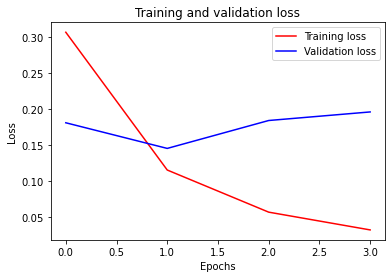

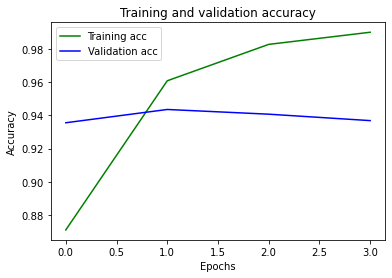

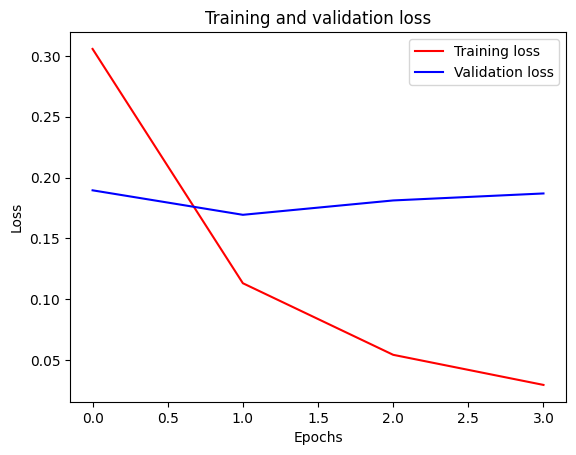

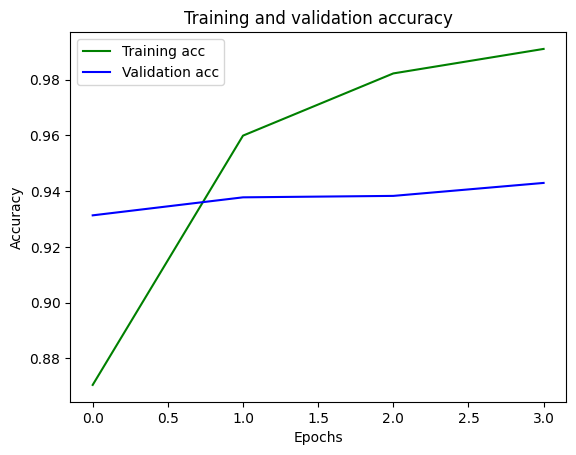

>>>>>>> remote


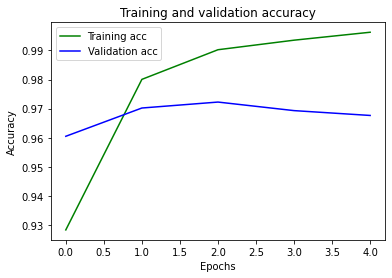

In [ ]:
plotHistory(rnn_title_history)

In [ ]:
rnn_title_model.evaluate(X_train1, y_train)

<<<<<<< local <modified: >


725/725 [==============================] - 12s 16ms/step - loss: 0.0544 - accuracy: 0.9865


725/725 [==============================] - 3s 5ms/step - loss: 0.0579 - accuracy: 0.9818


>>>>>>> remote <modified: >
<<<<<<< local


[0.05436372384428978, 0.9865482449531555]

[0.057937514036893845, 0.9818487763404846]

>>>>>>> remote


In [ ]:
rnn_title_model.evaluate(X_val1, y_val)

<<<<<<< local <modified: >


242/242 [==============================] - 4s 16ms/step - loss: 0.1450 - accuracy: 0.9436


242/242 [==============================] - 1s 5ms/step - loss: 0.1695 - accuracy: 0.9378


>>>>>>> remote <modified: >
<<<<<<< local


[0.14502878487110138, 0.9436109662055969]

[0.16945888102054596, 0.9377909898757935]

>>>>>>> remote


In [ ]:
rnn_title_model.evaluate(X_test1, y_test)

<<<<<<< local <modified: >


242/242 [==============================] - 4s 16ms/step - loss: 0.1502 - accuracy: 0.9430


242/242 [==============================] - 1s 5ms/step - loss: 0.1690 - accuracy: 0.9390


>>>>>>> remote <modified: >
<<<<<<< local


[0.15021859109401703, 0.9429643154144287]

[0.16899777948856354, 0.9389550089836121]

>>>>>>> remote


### Model 2: Training an LSTM model on titles only

In [ ]:
lstm_title_model = Sequential([
    Embedding(max_vocab1, 100, input_length=max_len1),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_title_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

lstm_title_model.summary()

<<<<<<< local


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 34, 100)           1973100   
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,207,853
Trainable params: 2,207,853
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 34, 100)           1938800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,173,553
Trainable params: 2,173,553
Non-trainable params: 0
_________________________________________________________________


>>>>>>> remote


In [ ]:
%%time
lstm_title_history = lstm_title_model.fit(X_train_title, y_train, epochs=10, 
                    validation_data=(X_val_title, y_val), batch_size=30, 
                    shuffle=True, callbacks=[early_stop])

<<<<<<< local


Epoch 1/10
774/774 [==============================] - 8s 10ms/step - loss: 0.0752 - accuracy: 0.9747 - val_loss: 0.1348 - val_accuracy: 0.9505
Epoch 2/10
774/774 [==============================] - 8s 10ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.1776 - val_accuracy: 0.9357
Epoch 3/10
774/774 [==============================] - 8s 10ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.1786 - val_accuracy: 0.9448
CPU times: total: 31.6 s
Wall time: 23.5 s


Epoch 1/10
774/774 [==============================] - 101s 124ms/step - loss: 0.3939 - accuracy: 0.8013 - val_loss: 0.1616 - val_accuracy: 0.9359
Epoch 2/10
774/774 [==============================] - 110s 143ms/step - loss: 0.1225 - accuracy: 0.9543 - val_loss: 0.1505 - val_accuracy: 0.9422
Epoch 3/10
774/774 [==============================] - 112s 145ms/step - loss: 0.0726 - accuracy: 0.9752 - val_loss: 0.1412 - val_accuracy: 0.9470
Epoch 4/10
774/774 [==============================] - 95s 123ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.1748 - val_accuracy: 0.9414
Epoch 5/10
774/774 [==============================] - 90s 116ms/step - loss: 0.0280 - accuracy: 0.9926 - val_loss: 0.1884 - val_accuracy: 0.9445
CPU times: user 16min 31s, sys: 4min 6s, total: 20min 37s
Wall time: 8min 28s


>>>>>>> remote


<<<<<<< local


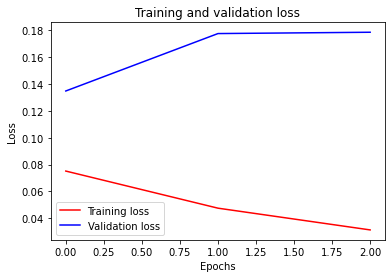

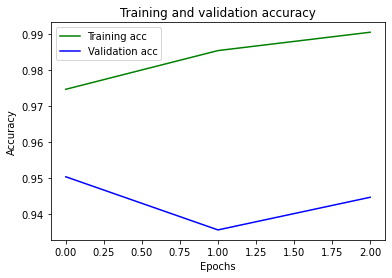

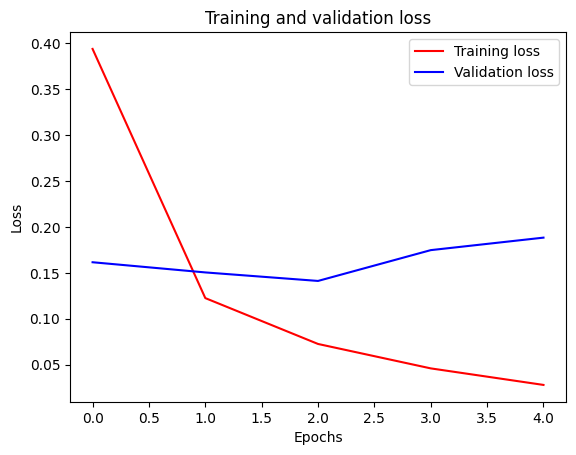

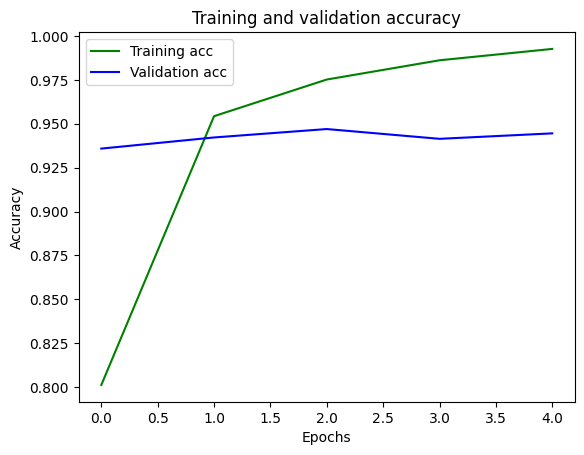

>>>>>>> remote


In [ ]:
plotHistory(lstm_title_history)

In [ ]:
lstm_title_model.evaluate(X_train1, y_train)

<<<<<<< local


725/725 [==============================] - 3s 4ms/step - loss: 0.0450 - accuracy: 0.9879


[0.04502788931131363, 0.9878848195075989]

725/725 [==============================] - 16s 22ms/step - loss: 0.0373 - accuracy: 0.9896


[0.0372762568295002, 0.9895662665367126]

>>>>>>> remote


In [ ]:
lstm_title_model.evaluate(X_val1, y_val)

<<<<<<< local


242/242 [==============================] - 1s 5ms/step - loss: 0.1348 - accuracy: 0.9505


[0.134831964969635, 0.9504656195640564]

242/242 [==============================] - 6s 23ms/step - loss: 0.1412 - accuracy: 0.9470


[0.14121194183826447, 0.9469736218452454]

>>>>>>> remote


In [ ]:
lstm_title_model.evaluate(X_test1, y_test)

<<<<<<< local


242/242 [==============================] - 1s 5ms/step - loss: 0.1357 - accuracy: 0.9472


[0.13569745421409607, 0.9472323060035706]

242/242 [==============================] - 6s 23ms/step - loss: 0.1477 - accuracy: 0.9468


[0.14769607782363892, 0.9468442797660828]

>>>>>>> remote


## 2. Training on all text (title + text)

### Training the word2vec model on the dataset

In [75]:
X_train2 = X_train['all_text']
X_val2 = X_val['all_text']
X_test2 = X_test['all_text']

In [76]:
<<<<<<< LOCAL CELL DELETED >>>>>>>
 # all tokens generated in the first article
print(X_train2[0])

['donald', 'trump', 'sends', 'embarrassing', 'new', 'year', 'eve', 'message', 'disturbing', 'donald', 'trump', 'wish', 'americans', 'happy', 'new', 'year', 'leave', 'instead', 'give', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'great', 'year', 'america', 'donald', 'trump', 'realdonaldtrump', 'december', 'trump', 'tweet', 'went', 'welll', 'expect', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberis

In [ ]:
# training word2vec on the 'text' corpus to form the embedding layer
from gensim.models import Word2Vec

EMBEDDING_DIM = 100
w2v = Word2Vec(
    sentences = X_train_alltext,
    vector_size = EMBEDDING_DIM,
    window = 5,
    min_count = 1
)

CPU times: user 1min 31s, sys: 767 ms, total: 1min 32s
Wall time: 35.2 s


In [ ]:
num = len(w2v.wv)
print('There are a total of %d words in the vocabulary of our trained word2vec model.' % num)

There are a total of 108281 words in the vocabulary of our trained word2vec model.


In [ ]:
w2v.wv["donald"]

<<<<<<< local


array([-1.2755212e+00, -2.4483891e-01, -3.3259077e+00,  1.1881393e+00,
       -1.5453155e+00, -8.5365903e-01, -1.8547323e+00,  1.1752487e+00,
       -1.6967301e+00,  2.0702002e+00, -9.6109229e-01,  1.4290427e+00,
        5.4061264e-01,  3.0945629e-01, -5.4003048e-01,  1.7356414e+00,
        3.8711023e-01, -2.8266547e+00,  3.3998659e+00, -5.0392532e-01,
        8.4177375e-01,  2.2277739e+00, -7.3250580e-01, -1.3489498e+00,
        2.0691831e+00, -3.0194716e+00, -3.1585147e+00,  1.9094899e+00,
       -2.9544780e-01,  1.5127783e+00, -9.7127974e-02,  2.7210884e+00,
        9.9397534e-01,  2.4506335e+00,  2.4139216e+00,  1.3392528e+00,
       -1.3870788e+00,  7.9234135e-01,  1.9755086e+00, -1.7639482e-01,
        1.4515284e+00, -1.9390098e+00, -6.0140169e-01,  1.9122498e+00,
        2.2628219e-03, -4.8189834e-01, -6.2620573e-02, -1.0337194e+00,
        1.0380130e-01,  1.2568979e+00,  2.1662867e+00,  1.9928960e+00,
       -7.5888580e-01, -3.8710940e-01, -1.5432696e+00,  5.4171437e-01,
      

array([-1.6314154 ,  1.4955556 , -1.4407815 ,  1.5171522 , -2.5575368 ,
       -0.56538314, -1.3531022 ,  0.9889945 , -1.2652371 ,  3.2407134 ,
       -0.92265886, -0.25792125, -0.01475068,  1.3487247 , -1.5101459 ,
        2.3005598 , -0.71978086, -2.933771  ,  3.6756122 , -1.132561  ,
        0.51757133,  0.96989316, -0.45367733, -0.25192797,  2.5143518 ,
       -3.2115    , -3.158529  ,  0.08550263, -0.3493004 ,  0.64664286,
       -0.6683444 ,  2.1531692 ,  1.9030342 ,  1.8107902 ,  1.3795037 ,
        2.1782067 , -1.0706915 ,  1.8116537 ,  0.07430641, -0.31939843,
        1.53058   , -0.2774306 ,  0.5602655 ,  0.561102  , -0.94820774,
       -0.5505203 , -0.8152316 ,  0.7697111 ,  0.0087425 , -0.16676944,
        1.5863199 ,  1.9513414 ,  0.2738626 ,  0.7467672 , -2.7104578 ,
       -0.20833962, -2.2161636 ,  0.3763268 ,  0.39972454, -1.7881414 ,
        0.8305237 ,  2.7834113 ,  1.5774425 ,  1.1892978 , -1.0226973 ,
       -2.1337926 ,  1.6630524 ,  0.21934755,  1.9383119 , -2.41

>>>>>>> remote


In [ ]:
w2v.wv.most_similar("trump")

<<<<<<< local


[('president-elect', 0.6297062039375305),
 ('instead', 0.526829719543457),
 ('course', 0.5192578434944153),
 ('actually', 0.5098420977592468),
 ('fact', 0.5029680132865906),
 ('conway', 0.49326539039611816),
 ('obama', 0.4837634563446045),
 ('yet', 0.4737081229686737),
 ('clearly', 0.46551617980003357),
 ('haiku', 0.4599129855632782)]

[('president-elect', 0.646259069442749),
 ('instead', 0.5322952270507812),
 ('conway', 0.5134116411209106),
 ('loose-lipped', 0.5096831321716309),
 ('course', 0.5056433081626892),
 ('actually', 0.49975472688674927),
 ('fact', 0.49385425448417664),
 ('wherevers', 0.4834011495113373),
 ('obama', 0.4752030372619629),
 ('exactly', 0.4715747535228729)]

>>>>>>> remote


### Preparing the neural network model inputs

In [ ]:
X_train_alltext,X_val_alltext,X_test_alltext, vocab_alltext = tokenize(X_train_alltext,X_val_alltext,X_test_alltext)
max_vocab_alltext = len(vocab_alltext) + 1
print("Vocab Size for All Text: {}".format(max_vocab_alltext))

Vocab Size for All Text: 108282


In [ ]:
# all token indexes generated from the first article
print(X_train2[0])

[596, 4, 1478, 9658, 1326, 836, 378, 211, 7, 20, 11, 2, 596, 4, 913, 1478, 945, 4, 3491, 1326, 1282, 1137, 6929, 1195, 378, 211, 7, 142, 360, 5112, 1478, 1326, 9, 2265, 2438, 39808, 253, 1270, 459, 393, 3454, 5946, 874, 3455, 20, 11, 2, 78, 337, 218]


<<<<<<< local


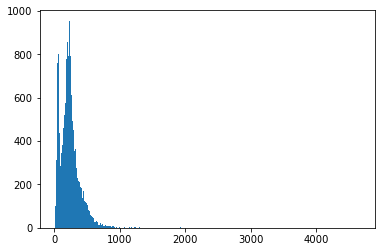

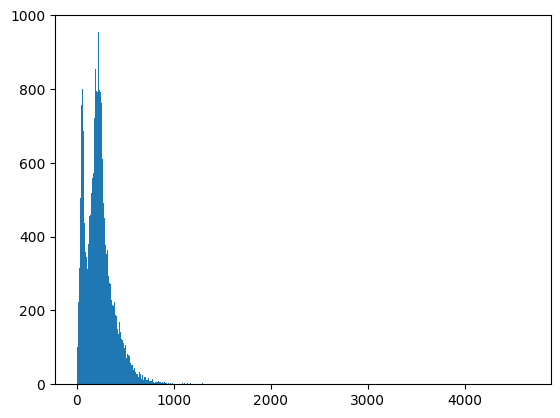

>>>>>>> remote


In [ ]:
article_lens = np.array([len(index) for index in X_train2])
plt.hist(article_lens, bins=500)
plt.show()

In [ ]:
len_1000 = article_lens[article_lens < 1000]
print('%d out of %d articles have less than 1000 words' % (len(len_1000),len(article_lens)))

23102 out of 23194 articles have less than 1000 words


<li>Since the inputs to the neural network have to be of the same size, we have to pad each article in the dataset.</li>
<li>Since the majority of articles have less than 1000 words, we pad shorter news articles and truncate longer articles.</li>

In [ ]:
max_len2 = 1000
X_train2, X_val2, X_test2 = pad(X_train2, X_val2, X_test2, max_len2)
print("Max All Text Length: {}".format(max_len2))

Max All Text Length: 1000


In [ ]:
# creating a weight matrix to retain weights learned by word2vec in the embedding layer later on
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # create weight matrix with number of rows = vocab_size and number of columns = number of embedding dimensions
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # for each word in the vocab, store its vector created by the word2vec model
    for word, row_index in vocab.items():
        weight_matrix[row_index] = model.wv[word]
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v, vocab2)

### Model 3: Training a simple RNN model on all text

In [ ]:
rnn_alltext_model = Sequential([
    Embedding(max_vocab2, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=max_len2, trainable=False),
    Bidirectional(SimpleRNN(units=128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

rnn_alltext_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

rnn_alltext_model.summary()

<<<<<<< local


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 100)         10828200  
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              58624     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 10,887,081
Trainable params: 58,881
Non-trainable params: 10,828,200
_________________________________________________________________


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         10828200  
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              58624     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 10,887,081
Trainable params: 58,881
Non-trainable params: 10,828,200
_________________________________________________________________


>>>>>>> remote


In [ ]:
%%time
rnn_alltext_history = rnn_alltext_model.fit(X_train_alltext, y_train, epochs=10, 
                                validation_data=(X_val_alltext, y_val), batch_size=30, 
                                shuffle=True, callbacks=[early_stop])

<<<<<<< local


Epoch 1/10
774/774 [==============================] - 1733s 2s/step - loss: 0.2064 - accuracy: 0.9314 - val_loss: 0.1804 - val_accuracy: 0.9399
Epoch 2/10
774/774 [==============================] - 1685s 2s/step - loss: 0.1834 - accuracy: 0.9407 - val_loss: 0.1634 - val_accuracy: 0.9470
Epoch 3/10
774/774 [==============================] - 1671s 2s/step - loss: 0.1656 - accuracy: 0.9487 - val_loss: 0.1577 - val_accuracy: 0.9507
Epoch 4/10
774/774 [==============================] - 1669s 2s/step - loss: 0.1661 - accuracy: 0.9474 - val_loss: 0.1546 - val_accuracy: 0.9484
Epoch 5/10
774/774 [==============================] - 1672s 2s/step - loss: 0.1630 - accuracy: 0.9495 - val_loss: 0.1496 - val_accuracy: 0.9512
Epoch 6/10
774/774 [==============================] - 1680s 2s/step - loss: 0.1491 - accuracy: 0.9538 - val_loss: 0.1490 - val_accuracy: 0.9484
Epoch 7/10
774/774 [==============================] - 1680s 2s/step - loss: 0.1458 - accuracy: 0.9550 - val_loss: 0.1435 - val_accuracy:

Epoch 1/10
774/774 [==============================] - 317s 407ms/step - loss: 0.3345 - accuracy: 0.8503 - val_loss: 0.1741 - val_accuracy: 0.9422
Epoch 2/10
774/774 [==============================] - 288s 372ms/step - loss: 0.1764 - accuracy: 0.9446 - val_loss: 0.1468 - val_accuracy: 0.9506
Epoch 3/10
774/774 [==============================] - 292s 377ms/step - loss: 0.1576 - accuracy: 0.9520 - val_loss: 0.1450 - val_accuracy: 0.9529
Epoch 4/10
774/774 [==============================] - 301s 389ms/step - loss: 0.1458 - accuracy: 0.9553 - val_loss: 0.1342 - val_accuracy: 0.9582
Epoch 5/10
774/774 [==============================] - 280s 362ms/step - loss: 0.1442 - accuracy: 0.9565 - val_loss: 0.1287 - val_accuracy: 0.9572
Epoch 6/10
774/774 [==============================] - 291s 376ms/step - loss: 0.1315 - accuracy: 0.9602 - val_loss: 0.1254 - val_accuracy: 0.9599
Epoch 7/10
774/774 [==============================] - 283s 365ms/step - loss: 0.1247 - accuracy: 0.9631 - val_loss: 0.1926 -

>>>>>>> remote


<<<<<<< local


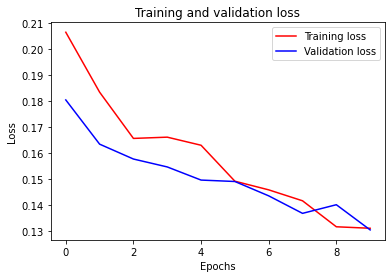

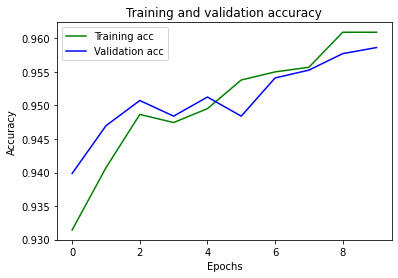

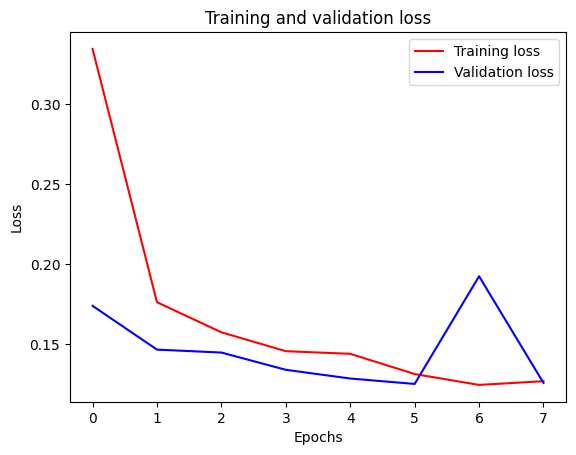

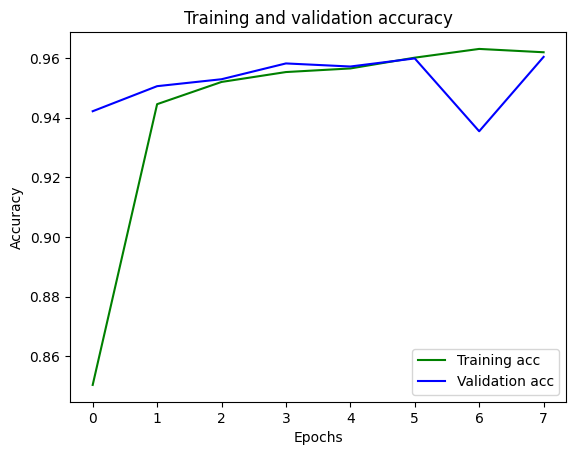

>>>>>>> remote


In [ ]:
plotHistory(rnn_alltext_history)

In [ ]:
rnn_alltext_model.evaluate(X_train2, y_train)

<<<<<<< local


725/725 [==============================] - 266s 367ms/step - loss: 0.1161 - accuracy: 0.9646


[0.11612874269485474, 0.96455979347229]

725/725 [==============================] - 69s 96ms/step - loss: 0.1136 - accuracy: 0.9660


[0.11355914920568466, 0.966025710105896]

>>>>>>> remote


In [ ]:
rnn_alltext_model.evaluate(X_val2, y_val)

<<<<<<< local


242/242 [==============================] - 88s 365ms/step - loss: 0.1304 - accuracy: 0.9586


[0.13042132556438446, 0.9586135745048523]

242/242 [==============================] - 26s 109ms/step - loss: 0.1254 - accuracy: 0.9599


[0.12535838782787323, 0.9599068760871887]

>>>>>>> remote


In [ ]:
rnn_alltext_model.evaluate(X_test2, y_test)

<<<<<<< local


242/242 [==============================] - 89s 367ms/step - loss: 0.1369 - accuracy: 0.9550


[0.13688859343528748, 0.9549922347068787]

242/242 [==============================] - 22s 90ms/step - loss: 0.1310 - accuracy: 0.9585


[0.1310245543718338, 0.9584842324256897]

>>>>>>> remote


### Model 4: Training an LSTM model on all text

In [ ]:
lstm_alltext_model = Sequential([
    Embedding(max_vocab2, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=max_len2, trainable=False),
    Bidirectional(LSTM(units=128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_alltext_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

lstm_alltext_model.summary()

<<<<<<< local


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1000, 100)         10828200  
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 11,062,953
Trainable params: 234,753
Non-trainable params: 10,828,200
_________________________________________________________________


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 100)         10828200  
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 11,062,953
Trainable params: 234,753
Non-trainable params: 10,828,200
_________________________________________________________________


>>>>>>> remote


In [ ]:
%%time
lstm_alltext_history = lstm_alltext_model.fit(X_train_alltext, y_train, epochs=10, 
                                validation_data=(X_val_alltext, y_val), batch_size=30, 
                                shuffle=True, callbacks=[early_stop])

<<<<<<< local


Epoch 1/10
774/774 [==============================] - 63s 77ms/step - loss: 0.1838 - accuracy: 0.9333 - val_loss: 0.0928 - val_accuracy: 0.9692
Epoch 2/10
774/774 [==============================] - 59s 76ms/step - loss: 0.0843 - accuracy: 0.9715 - val_loss: 0.0696 - val_accuracy: 0.9771
Epoch 3/10
774/774 [==============================] - 59s 76ms/step - loss: 0.0673 - accuracy: 0.9776 - val_loss: 0.0588 - val_accuracy: 0.9809
Epoch 4/10
774/774 [==============================] - 59s 76ms/step - loss: 0.0568 - accuracy: 0.9821 - val_loss: 0.0545 - val_accuracy: 0.9824
Epoch 5/10
774/774 [==============================] - 59s 76ms/step - loss: 0.0469 - accuracy: 0.9844 - val_loss: 0.0582 - val_accuracy: 0.9811
Epoch 6/10
774/774 [==============================] - 59s 76ms/step - loss: 0.0445 - accuracy: 0.9851 - val_loss: 0.0473 - val_accuracy: 0.9837
Epoch 7/10
774/774 [==============================] - 59s 76ms/step - loss: 0.0510 - accuracy: 0.9824 - val_loss: 0.0486 - val_accuracy:

Epoch 1/10
774/774 [==============================] - 1350s 2s/step - loss: 0.1743 - accuracy: 0.9409 - val_loss: 0.1068 - val_accuracy: 0.9634
Epoch 2/10
774/774 [==============================] - 1257s 2s/step - loss: 0.0824 - accuracy: 0.9726 - val_loss: 0.0672 - val_accuracy: 0.9768
Epoch 3/10
774/774 [==============================] - 1222s 2s/step - loss: 0.0722 - accuracy: 0.9763 - val_loss: 0.0578 - val_accuracy: 0.9794
Epoch 4/10
774/774 [==============================] - 1230s 2s/step - loss: 0.0634 - accuracy: 0.9792 - val_loss: 0.0617 - val_accuracy: 0.9785
Epoch 5/10
774/774 [==============================] - 1226s 2s/step - loss: 0.0571 - accuracy: 0.9812 - val_loss: 0.0840 - val_accuracy: 0.9758
CPU times: user 4h 59min 12s, sys: 59min 43s, total: 5h 58min 55s
Wall time: 1h 44min 45s


>>>>>>> remote


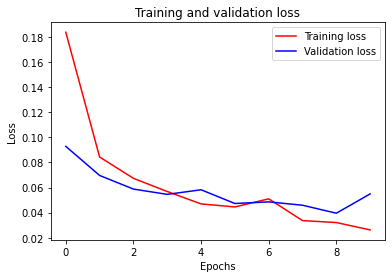

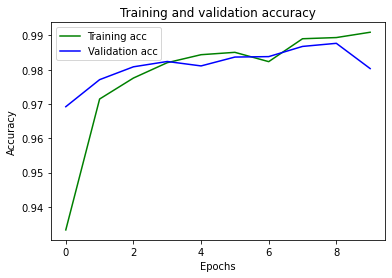

In [94]:
plotHistory(lstm_alltext_history)

In [95]:
lstm_alltext_model.evaluate(X_train2, y_train)

725/725 [==============================] - 27s 37ms/step - loss: 0.0309 - accuracy: 0.9894


[0.03091881424188614, 0.9893506765365601]

In [96]:
lstm_alltext_model.evaluate(X_val2, y_val)

242/242 [==============================] - 9s 37ms/step - loss: 0.0549 - accuracy: 0.9803


[0.0549151711165905, 0.9803414344787598]

In [97]:
lstm_alltext_model.evaluate(X_test2, y_test)

242/242 [==============================] - 9s 36ms/step - loss: 0.0495 - accuracy: 0.9849


[0.04950638487935066, 0.9848681092262268]

### Hyperparameter tuning for LSTM model for all text

In [ ]:
def hyperparameterTuning(hp): #https://keras.io/api/keras_tuner/hyperparameters/
    model = Sequential([
        Embedding(max_vocab2, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=max_len2, trainable=False),
        Bidirectional(LSTM(units=hp.Int('units', min_value=64, max_value=192, step=64))), #https://keras.io/api/layers/recurrent_layers/simple_rnn/
        Dropout(rate=hp.Float('rate', min_value=0.3, max_value=0.7, step=0.2)), #https://keras.io/api/layers/regularization_layers/dropout/
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
    return model

In [ ]:
#https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f
tuner = keras_tuner.BayesianOptimization(hyperparameterTuning,
                              objective='val_loss',
                             directory='lstm_tuner2')

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
tuner.search(X_train2, y_train, epochs=10, 
            validation_data=(X_val2, y_val), batch_size=30, 
            shuffle=True, callbacks=[early_stop])

<<<<<<< local <modified: >


Trial 10 Complete [00h 09m 58s]
val_loss: 0.04726569354534149

Best val_loss So Far: 0.03519487380981445
Total elapsed time: 01h 47m 50s
INFO:tensorflow:Oracle triggered exit


>>>>>>> remote <removed>


In [101]:
tuner.results_summary()

Results summary
Results in lstm_tuner2\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 192
rate: 0.3
Score: 0.03519487380981445
Trial summary
Hyperparameters:
units: 192
rate: 0.3
Score: 0.03970800340175629
Trial summary
Hyperparameters:
units: 192
rate: 0.7
Score: 0.04148132726550102
Trial summary
Hyperparameters:
units: 128
rate: 0.7
Score: 0.042161814868450165
Trial summary
Hyperparameters:
units: 128
rate: 0.5
Score: 0.04451650008559227
Trial summary
Hyperparameters:
units: 192
rate: 0.3
Score: 0.04726569354534149
Trial summary
Hyperparameters:
units: 192
rate: 0.5
Score: 0.04821743443608284
Trial summary
Hyperparameters:
units: 64
rate: 0.5
Score: 0.0489145964384079
Trial summary
Hyperparameters:
units: 64
rate: 0.7
Score: 0.05317825824022293
Trial summary
Hyperparameters:
units: 128
rate: 0.3
Score: 0.06557958573102951


In [102]:
best_lstm_model = tuner.get_best_models(num_models=1)[0]

In [103]:
best_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         10828200  
                                                                 
 bidirectional (Bidirectiona  (None, 384)              450048    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 1)                 385       
                                                                 
Total params: 11,278,633
Trainable params: 450,433
Non-trainable params: 10,828,200
_________________________________________________________________


In [104]:
best_lstm_model.evaluate(X_train2, y_train)

725/725 [==============================] - 29s 39ms/step - loss: 0.0192 - accuracy: 0.9933


[0.01915656216442585, 0.9933172464370728]

In [105]:
best_lstm_model.evaluate(X_val2, y_val)

242/242 [==============================] - 9s 39ms/step - loss: 0.0352 - accuracy: 0.9886


[0.03519487753510475, 0.9886187314987183]

In [106]:
best_lstm_model.evaluate(X_test2, y_test)

242/242 [==============================] - 9s 39ms/step - loss: 0.0369 - accuracy: 0.9877


[0.03685575723648071, 0.9877133965492249]